In [1]:
# Import necessary libraries and modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from fastbook import *
from fastai.tabular.all import *
from dtreeviz.trees import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sys

sys.path.append("ACC_Project")

# Import custom classes
from functions.value_encoding import DataEncoder

# Load the dataset and select relevant columns
data = pd.read_csv("processed_data.csv", low_memory=False)
data.drop(columns="description", inplace=True)


/Users/workaccount/Documents/coding/accounting_project/myenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
data

,account,amount,direction,label,day_of_week,bank
0,a 1,7.503505,credit,Income,Tuesday,a
1,a 1,2.772589,debit,LSP Reimbursements Receivable,Tuesday,a
2,a 1,2.772589,debit,LSP Reimbursements Receivable,Tuesday,a
3,a 1,5.508376,debit,LSP Reimbursements Receivable,Tuesday,a
4,a 1,1.568616,debit,LSP Reimbursements Receivable,Tuesday,a
...,...,...,...,...,...,...
1702,a 3,7.429818,debit,LSP Reimbursements Receivable,Wednesday,a
1703,a 3,6.859174,debit,Payroll,Wednesday,a
1704,a 3,5.837730,debit,Payroll,Wednesday,a
1705,a 3,8.932965,credit,Financing,Wednesday,a


In [3]:
data.describe()

,amount
count,1707.000000
mean,6.832382
std,2.155905
min,-0.510826
25%,5.509024
50%,7.275830
75%,8.156803
max,15.424948


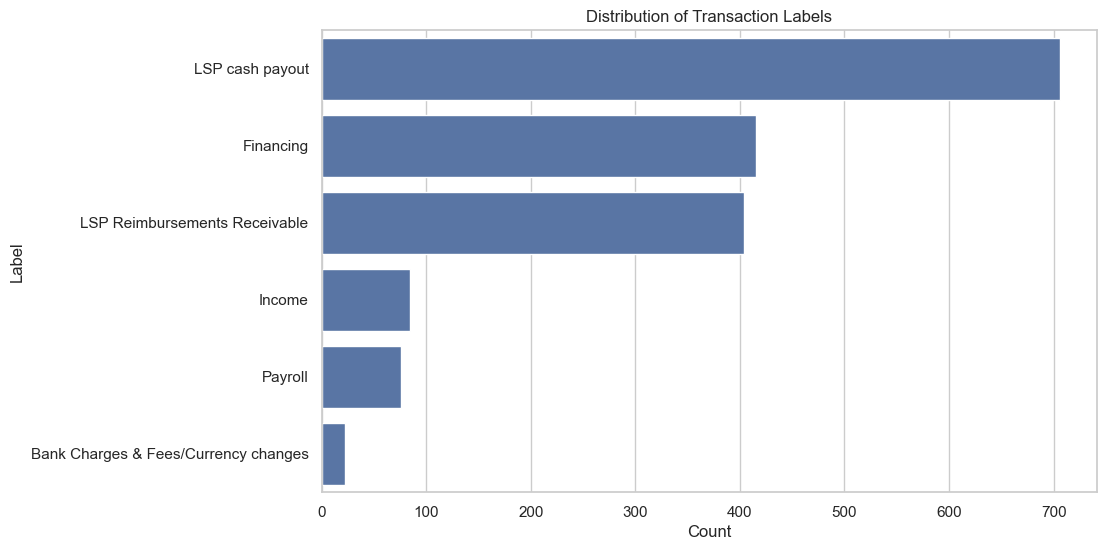

In [4]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Distribution of the target variable 'label'
plt.figure(figsize=(10, 6))
sns.countplot(y="label", data=data, order=data["label"].value_counts().index)
plt.title("Distribution of Transaction Labels")
plt.xlabel("Count")
plt.ylabel("Label")
plt.show()


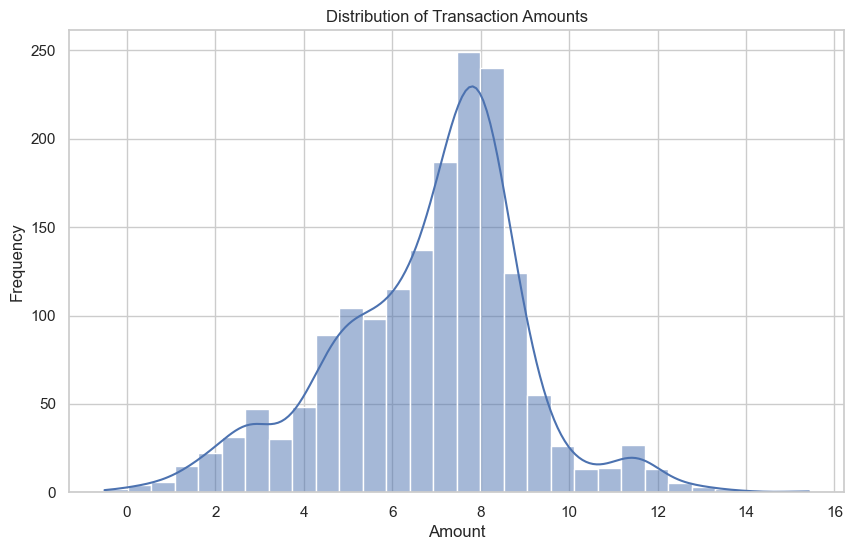

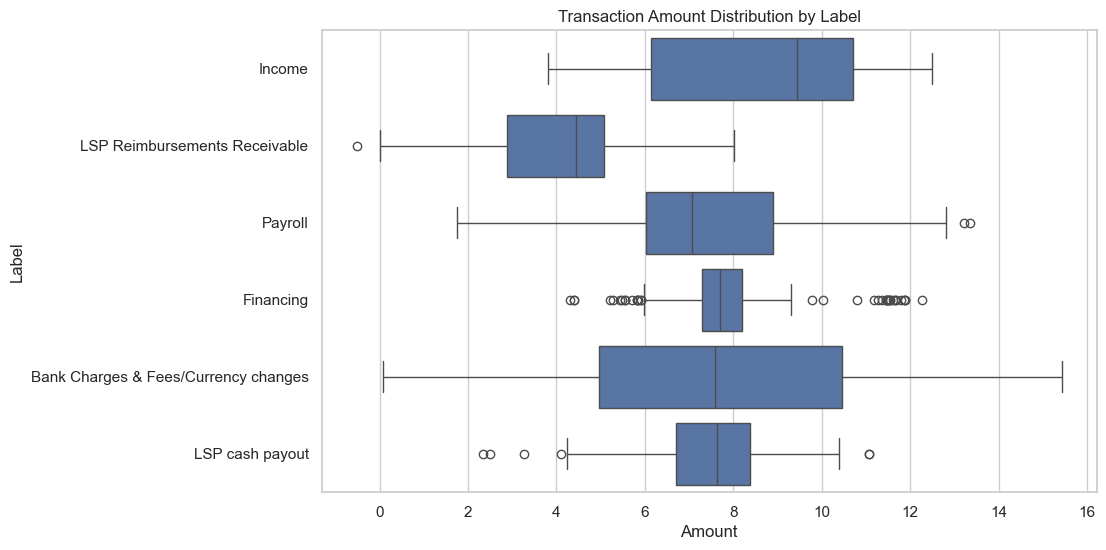

In [5]:
# Distribution of the 'amount' feature
plt.figure(figsize=(10, 6))
sns.histplot(data["amount"], kde=True, bins=30)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

# Boxplot to see the distribution of 'amount' across different labels
plt.figure(figsize=(10, 6))
sns.boxplot(y="label", x="amount", data=data)
plt.title("Transaction Amount Distribution by Label")
plt.xlabel("Amount")
plt.ylabel("Label")
plt.show()


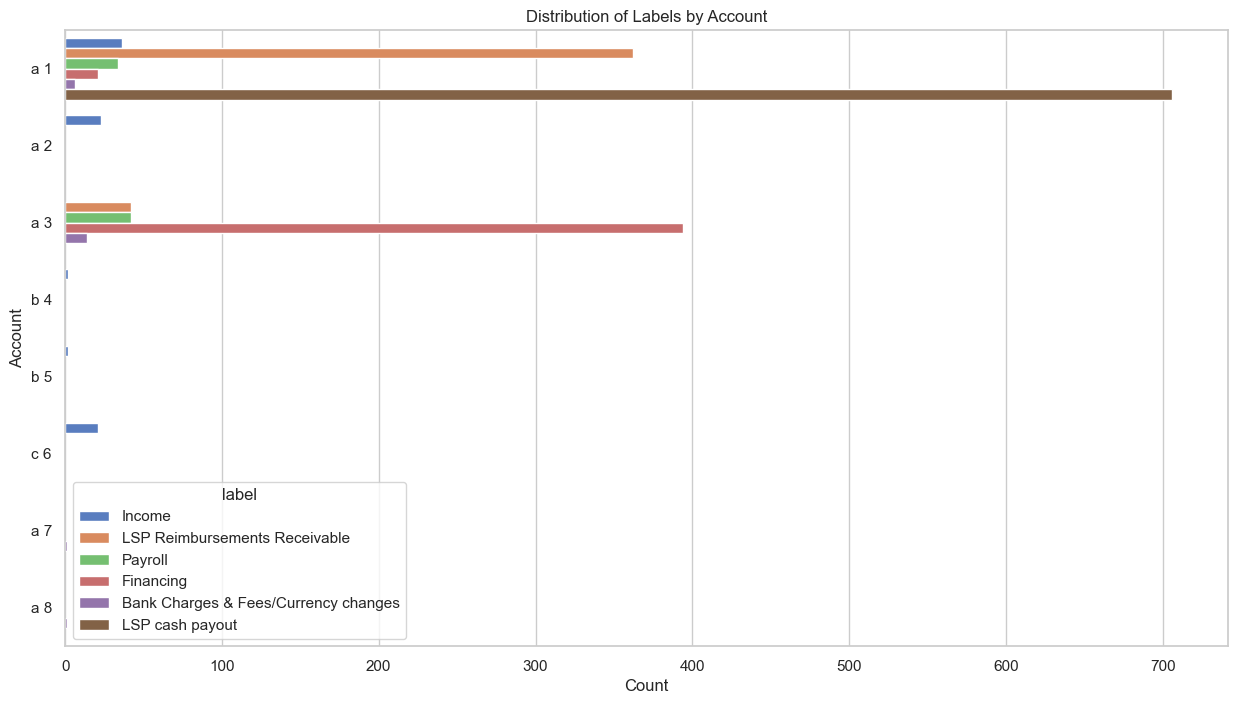

In [6]:
# Count plot for 'account' feature against the labels
plt.figure(figsize=(15, 8))
sns.countplot(y="account", hue="label", data=data, palette="muted")
plt.title("Distribution of Labels by Account")
plt.xlabel("Count")
plt.ylabel("Account")
plt.show()


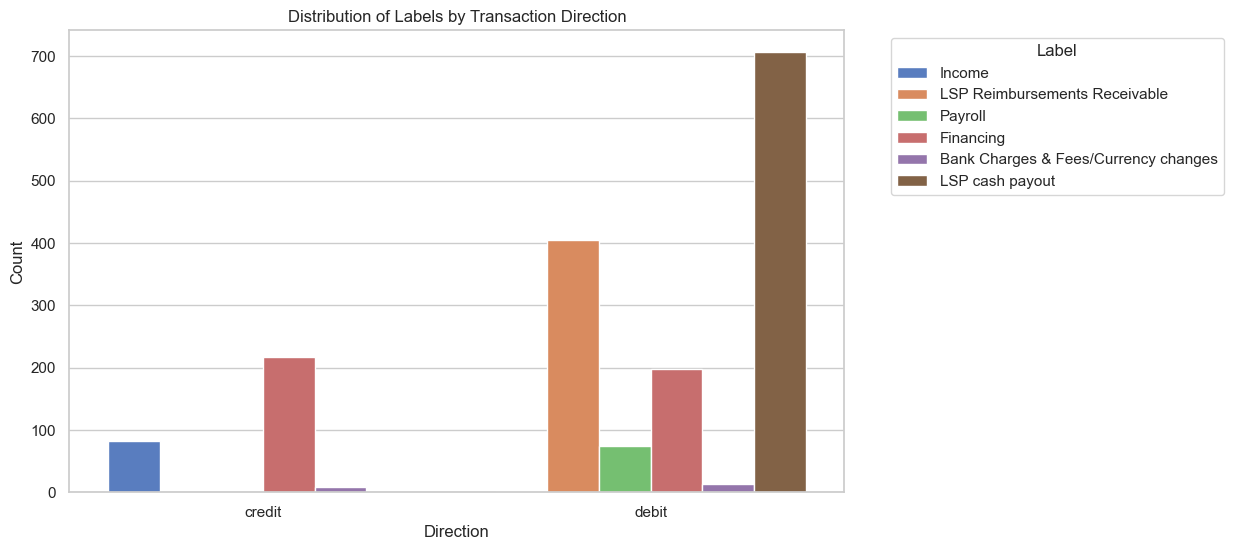

In [7]:
# Count plot for 'direction' feature against the labels
plt.figure(figsize=(10, 6))
sns.countplot(x='direction', hue='label', data=data, palette="muted")
plt.title('Distribution of Labels by Transaction Direction')
plt.xlabel('Direction')
plt.ylabel('Count')
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [8]:
data.label.value_counts()

label
LSP cash payout                         706
Financing                               415
LSP Reimbursements Receivable           404
Income                                   84
Payroll                                  76
Bank Charges & Fees/Currency changes     22
Name: count, dtype: int64

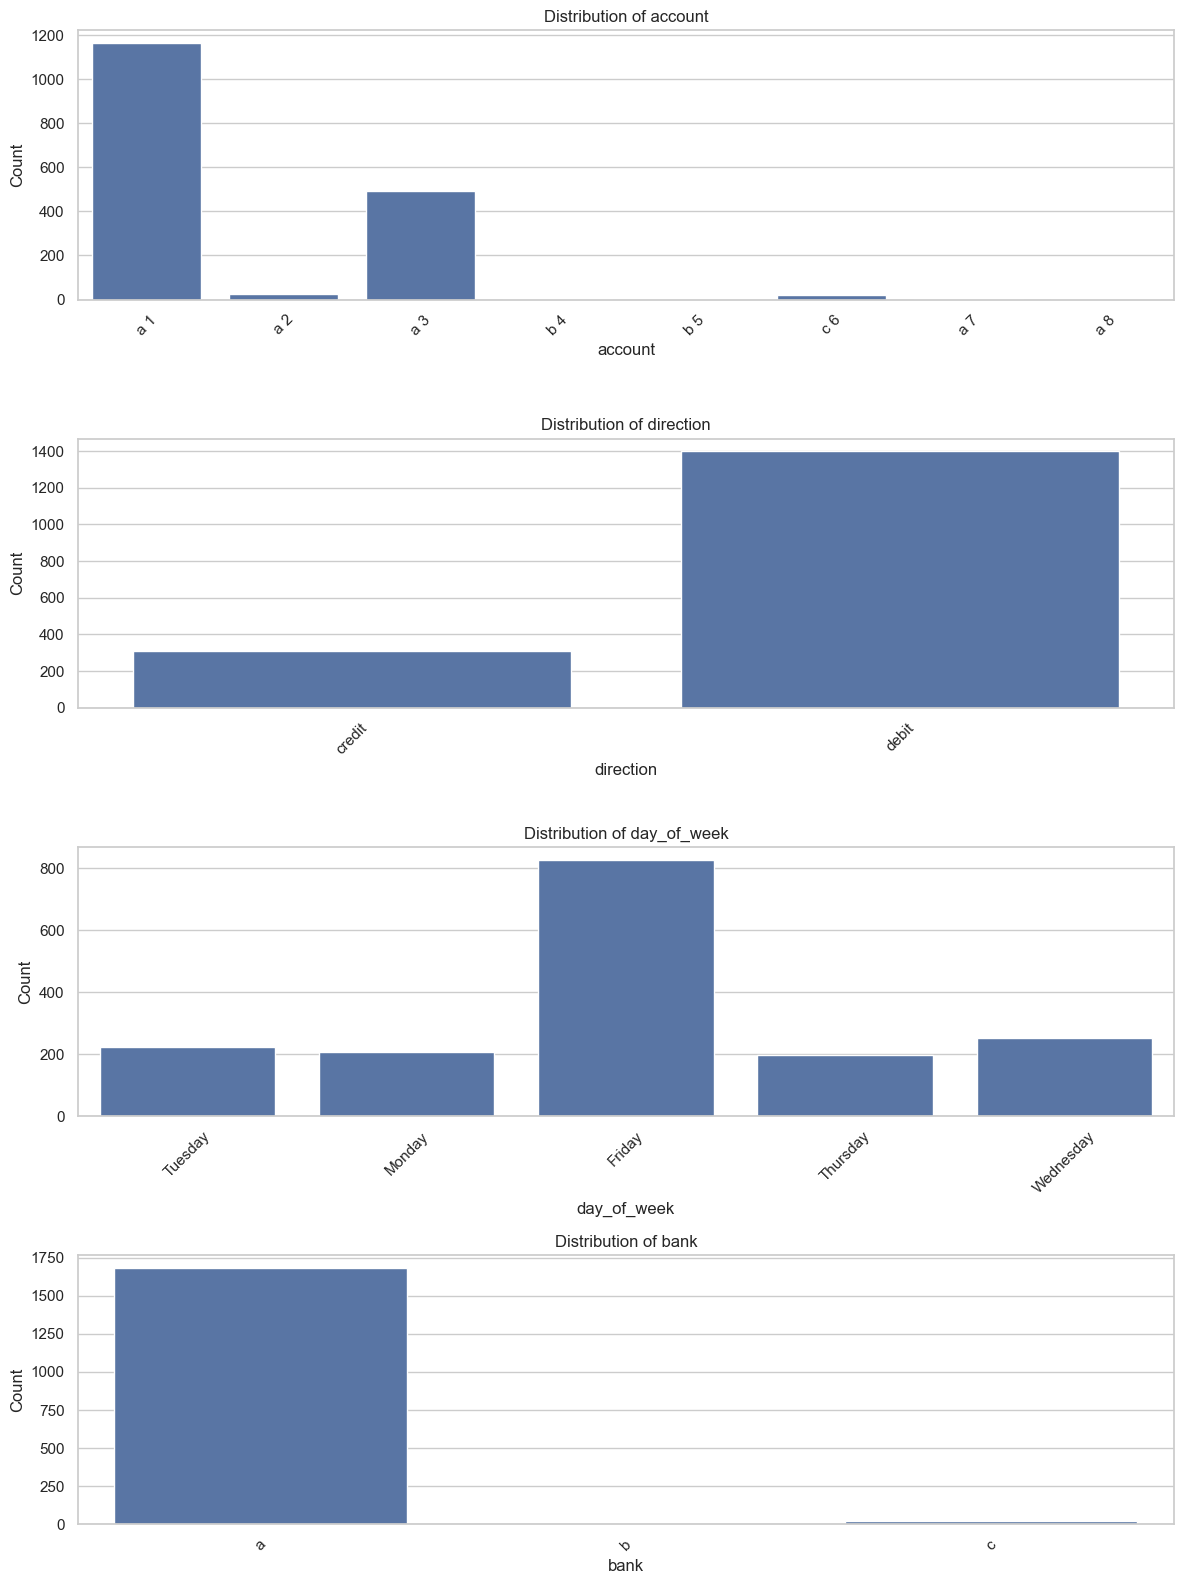

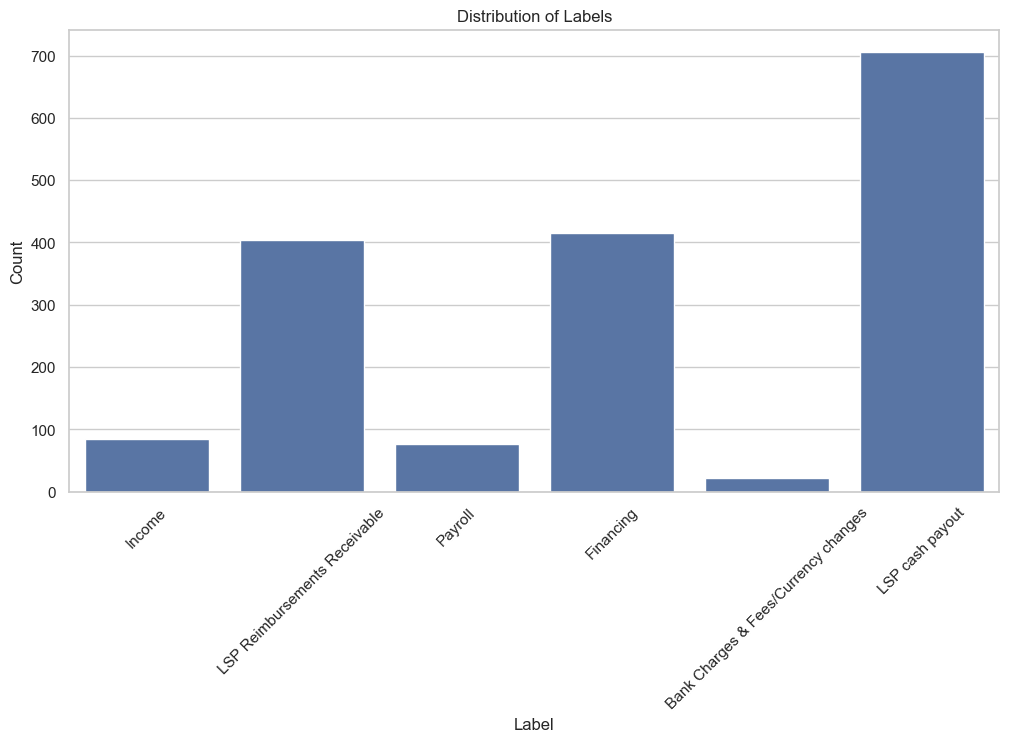

In [9]:
# Analyzing the distribution of categorical features
categorical_features = ["account", "direction", "day_of_week", "bank"]

fig, axes = plt.subplots(
    len(categorical_features), 1, figsize=(12, len(categorical_features) * 4)
)

for i, cat_feature in enumerate(categorical_features):
    sns.countplot(data=data, x=cat_feature, ax=axes[i])
    axes[i].set_title(f"Distribution of {cat_feature}")
    axes[i].set_xlabel(cat_feature)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

# Analyzing the balance of the 'label' column
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="label")
plt.title("Distribution of Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


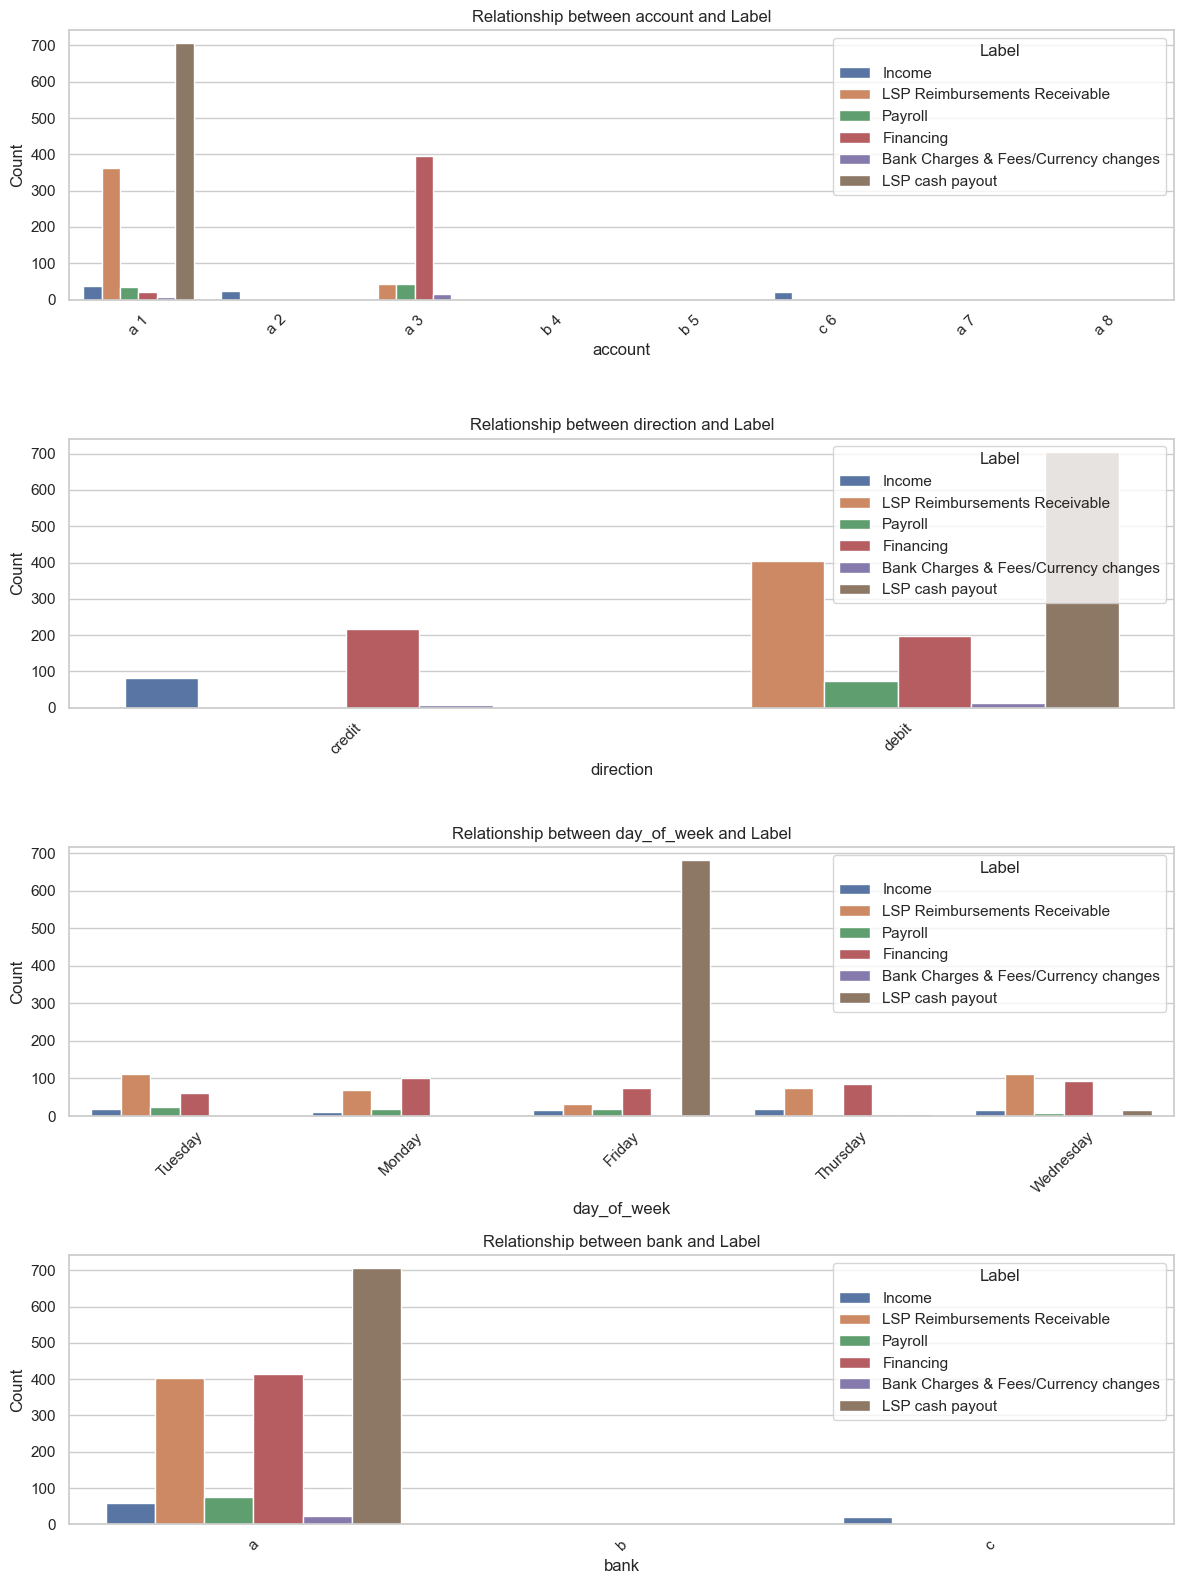

In [10]:
# Now let's analyze the relationships between features and the 'label' column
# We'll create plots for each categorical feature against the 'label' column
fig, axes = plt.subplots(len(categorical_features), 1, figsize=(12, len(categorical_features) * 4))

for i, cat_feature in enumerate(categorical_features):
    sns.countplot(data=data, x=cat_feature, hue='label', ax=axes[i])
    axes[i].set_title(f'Relationship between {cat_feature} and Label')
    axes[i].set_xlabel(cat_feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Label', loc='upper right')

plt.tight_layout()
plt.show()



In [11]:
encoder = DataEncoder(data)
encoded_data = encoder.transform(data)

X_train, X_test, y_train, y_test = encoder.split_data(encoded_data, 0.2)


decision tree prediction 0.8859649122807017


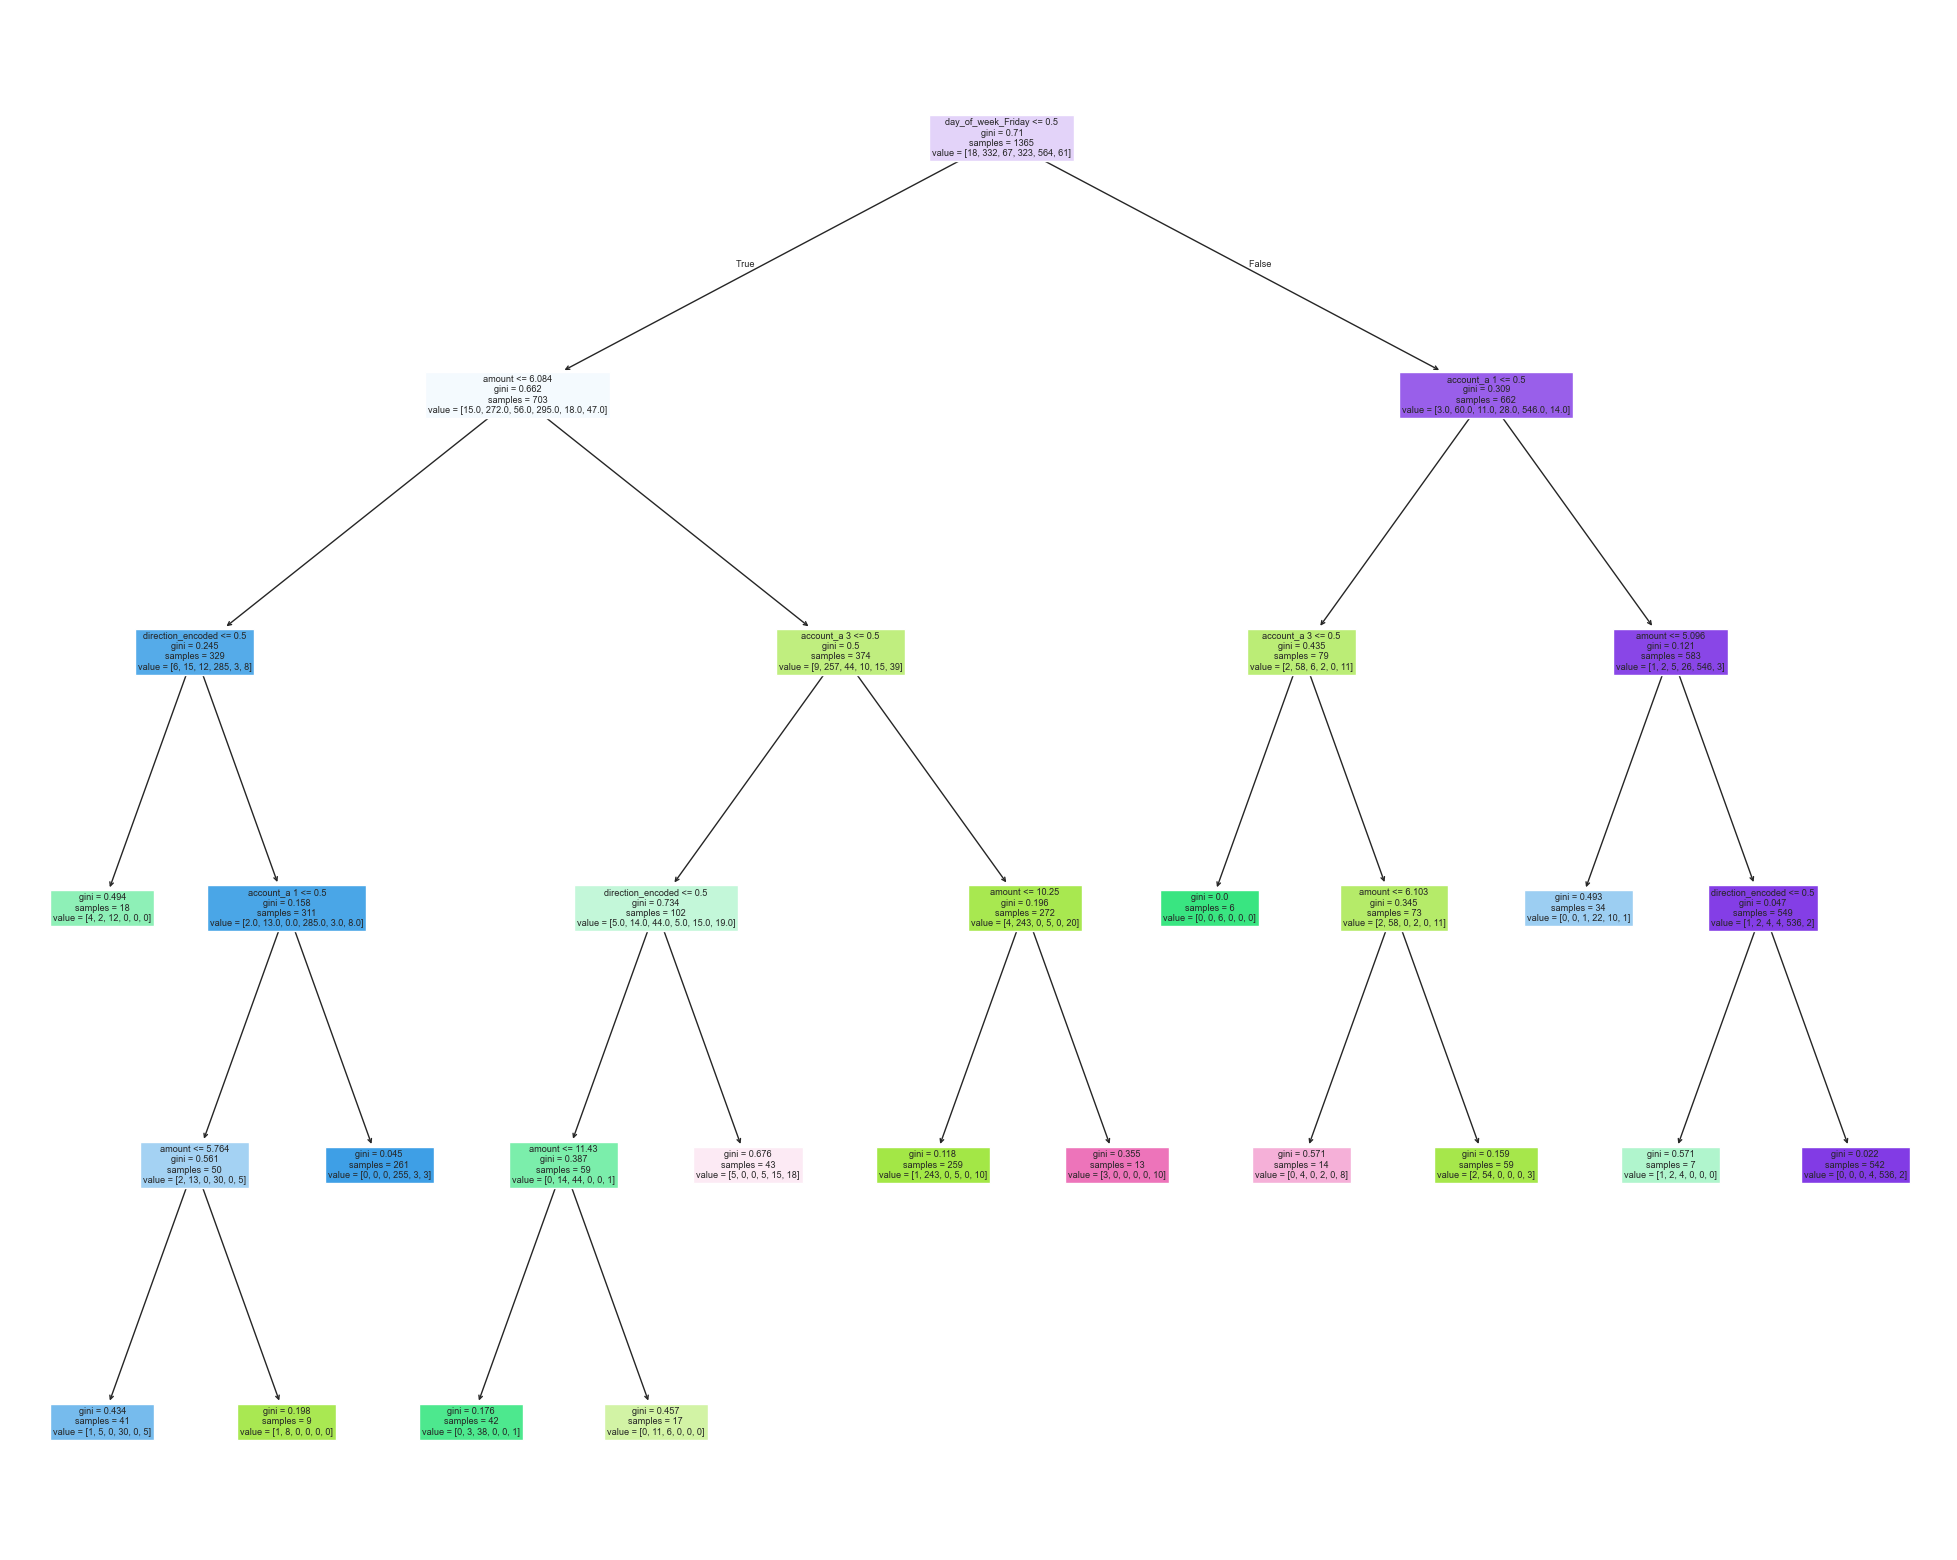

In [15]:
m = DecisionTreeClassifier(max_leaf_nodes=15)
m.fit(X_train, y_train)

fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(m, feature_names=X_train.columns, filled=True)

print("decision tree prediction", (m.predict(X_test) == y_test).sum() / len(y_test))


In [16]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

fi = rf_feat_importance(m, X_train)
fi[:10]

,cols,imp
8,day_of_week_Friday,0.373499
16,amount,0.335460
0,account_a 1,0.136447
2,account_a 3,0.085241
17,direction_encoded,0.069352
5,account_b 4,0.000000
6,account_b 5,0.000000
7,account_c 6,0.000000
4,account_a 8,0.000000
1,account_a 2,0.000000


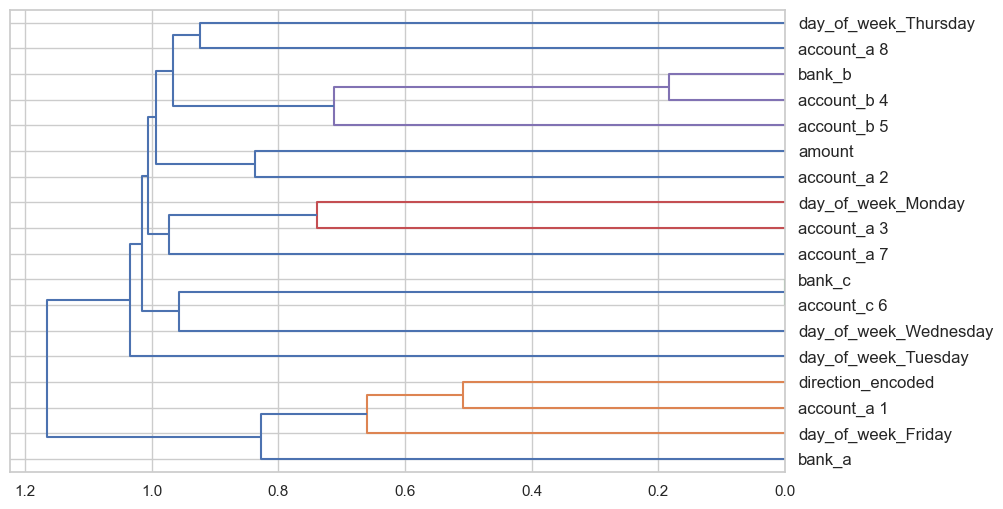

In [17]:
cluster_columns(X_train)
